In [141]:
import numpy as np
import pandas as pd
import pickle as pickle

from methods import *
from datetime import datetime
from sklearn.linear_model import LinearRegression

import importlib
import sys
importlib.reload(sys.modules['methods'])

<module 'methods' from 'C:\\Users\\Max\\PycharmProjects\\EastCoastDatathon\\methods.py'>

In [13]:
trips2011 = pd.read_csv("Data/date-hour-soo-dest-2011.csv", names=["Date","Hour","Origin","Destination","Trips"])
print(trips2011)
trips2011['DateTime'] = trips2011.apply(lambda x: datetime.strptime(x['Date']+' ' + str(x['Hour']), '%Y-%m-%d %H'), axis=1)

               Date  Hour Origin Destination  Trips
0        2011-01-01     0   12TH        12TH      1
1        2011-01-01     0   12TH        16TH      1
2        2011-01-01     0   12TH        24TH      3
3        2011-01-01     0   12TH        ASHB      2
4        2011-01-01     0   12TH        BAYF      5
...             ...   ...    ...         ...    ...
9430409  2012-01-01     2   WOAK        MCAR      4
9430410  2012-01-01     2   WOAK        MONT      7
9430411  2012-01-01     2   WOAK        POWL      5
9430412  2012-01-01     2   WOAK        UCTY      1
9430413  2012-01-01     2   WOAK        WOAK      1

[9430414 rows x 5 columns]


In [16]:
print(trips2011)
trips2011.to_csv("2011-DateTime.csv")

               Date  Hour Origin Destination  Trips            DateTime
0        2011-01-01     0   12TH        12TH      1 2011-01-01 00:00:00
1        2011-01-01     0   12TH        16TH      1 2011-01-01 00:00:00
2        2011-01-01     0   12TH        24TH      3 2011-01-01 00:00:00
3        2011-01-01     0   12TH        ASHB      2 2011-01-01 00:00:00
4        2011-01-01     0   12TH        BAYF      5 2011-01-01 00:00:00
...             ...   ...    ...         ...    ...                 ...
9430409  2012-01-01     2   WOAK        MCAR      4 2012-01-01 02:00:00
9430410  2012-01-01     2   WOAK        MONT      7 2012-01-01 02:00:00
9430411  2012-01-01     2   WOAK        POWL      5 2012-01-01 02:00:00
9430412  2012-01-01     2   WOAK        UCTY      1 2012-01-01 02:00:00
9430413  2012-01-01     2   WOAK        WOAK      1 2012-01-01 02:00:00

[9430414 rows x 6 columns]


In [3]:
fileNames = ["date-hour-soo-dest-2011.csv", "date-hour-soo-dest-2012.csv", "date-hour-soo-dest-2013.csv", "date-hour-soo-dest-2014.csv", "date-hour-soo-dest-2015.csv", "date-hour-soo-dest-2016.csv"]
outputNames = ["2011-DateTime.csv", "2012-DateTime.csv", "2013-DateTime.csv", "2014-DateTime.csv.csv", "2015-DateTime.csv", "2016-DateTime.csv"]
for fileName, outputName in zip(fileNames, outputNames):
    temp = pd.read_csv('Data/' + fileName, names=["Date","Hour","Origin","Destination","Trips"])
    print("read " + fileName)
    temp['DateTime'] = temp.apply(lambda x: datetime.strptime(x['Date']+' ' + str(x['Hour']), '%Y-%m-%d %H'), axis=1)
    print("datetime'd " + fileName)
    temp.to_csv(outputName)
    print("dumped " + outputName)

read date-hour-soo-dest-2011.csv
datetime'd date-hour-soo-dest-2011.csv
dumped 2011-DateTime.csv
read date-hour-soo-dest-2012.csv
datetime'd date-hour-soo-dest-2012.csv
dumped 2012-DateTime.csv
read date-hour-soo-dest-2013.csv
datetime'd date-hour-soo-dest-2013.csv
dumped 2013-DateTime.csv
read date-hour-soo-dest-2014.csv
datetime'd date-hour-soo-dest-2014.csv
dumped 2014-DateTime.csv.csv
read date-hour-soo-dest-2015.csv
datetime'd date-hour-soo-dest-2015.csv
dumped 2015-DateTime.csv
read date-hour-soo-dest-2016.csv
datetime'd date-hour-soo-dest-2016.csv
dumped 2016-DateTime.csv


In [5]:
tripData = pd.read_csv("Data/ridership_new_new.csv", header=0)
print(tripData)

                 day  hour enter_abbr exit_abbr  trip_count  \
0         2011-01-01     0       12TH      16TH           1   
1         2011-01-01     0       12TH      24TH           3   
2         2011-01-01     0       12TH      ASHB           2   
3         2011-01-01     0       12TH      BAYF           5   
4         2011-01-01     0       12TH      CIVC           3   
...              ...   ...        ...       ...         ...   
48763189  2015-12-31    23       WOAK      MONT         122   
48763190  2015-12-31    23       WOAK      PITT           1   
48763191  2015-12-31    23       WOAK      PLZA           5   
48763192  2015-12-31    23       WOAK      POWL          24   
48763193  2015-12-31    23       WOAK      RICH           1   

                     datetime  day_of_week  
0         2011-01-01 00:00:00            5  
1         2011-01-01 00:00:00            5  
2         2011-01-01 00:00:00            5  
3         2011-01-01 00:00:00            5  
4         2011-01-

In [28]:
stations = tripData["enter_abbr"].unique()

In [19]:
stationData = pd.read_csv("Data/stations.csv", header=0)
print(stationData)

                                 name  abbr   latitude   longitude  \
0        12th St. Oakland City Center  12TH  37.803664 -122.271604   
1                    16th St. Mission  16TH  37.765062 -122.419694   
2                    19th St. Oakland  19TH  37.807870 -122.269029   
3                    24th St. Mission  24TH  37.752254 -122.418466   
4                               Ashby  ASHB  37.853024 -122.269780   
5                         Balboa Park  BALB  37.721981 -122.447414   
6                            Bay Fair  BAYF  37.697185 -122.126871   
7                       Castro Valley  CAST  37.690754 -122.075567   
8               Civic Center/UN Plaza  CIVC  37.779528 -122.413756   
9                            Coliseum  COLS  37.754006 -122.197273   
10                              Colma  COLM  37.684638 -122.466233   
11                            Concord  CONC  37.973737 -122.029095   
12                          Daly City  DALY  37.706121 -122.469081   
13                  

In [76]:
dates = list()
monthLengths = dict()
for year in {2011, 2012, 2013, 2014, 2015}:
    for month in range(12):
        tempMonthStr = ''
        if len(str(month + 1)) == 1:
            tempMonthStr = '' + str(year) + '-0' + str(month + 1)
            dates.append(tempMonthStr)
        else:
            tempMonthStr = '' + str(year) + '-' + str(month + 1)
            dates.append(tempMonthStr)

        if month + 1 in {1, 3, 5, 7, 8, 10, 12}:
            monthLengths[tempMonthStr] = 31
        elif year == 2012 and month == 2:
            monthLengths[tempMonthStr] = 29
        elif month == 2:
            monthLengths[tempMonthStr] = 28
        else:
            monthLengths[tempMonthStr] = 30

print(dates)
print(monthLengths)

buckets = {
    "am_peak": {6,7,8,9,10},
    "pm_peak": {15, 16, 17, 18, 19, 20},
    "noon": {11, 12, 13, 14},
    "night": {21, 22, 23, 0, 1, 2, 3, 4, 5}
}

print(buckets)



['2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12']
{'2011-01': 31, '2011-02': 30, '2011-03': 31, '2011-04': 30, '2011-05': 31, '2011-06': 30, '2011-07': 31, '2011-08': 31, '2011-09': 30, '2011-10': 31, '2011-11': 30, '2011-12': 31, '2012-01': 31, '2012-02': 30, '2012-03': 31, '2012-04': 30, '2012-05': 31, '2012-06': 30, '2012-07': 31, '2012-08': 31, '2012-09': 30, '2012-10': 31, '2012-11

In [70]:
tripDataDict = dict()
for row in tripData.itertuples():
    date = row.day[:-2]
    hour = row.hour
    enterStation = row.enter_abbr
    exitStation = row.exit_abbr
    riders = row.trip_count
    tempBucket = None
    for bucket in buckets:
        if hour in buckets[bucket]:
            tempBucket = bucket
    tempKey = ((enterStation, exitStation), date, tempBucket)
    if tempKey not in tripDataDict:
        tripDataDict[tempKey] = riders
    else:
        tripDataDict[tempKey] += riders
    if row.Index % 1000000 == 0:
        print(row.Index)

print(tripDataDict)

0
1000000
2000000
3000000
4000000


KeyboardInterrupt: 

In [71]:
tripDataDict = pickle.load(open("tripDataDict.pickle", "rb"))

In [42]:
print(tripDataDict)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [60]:
monthTotalRiders = {}

for ridership in tripDataDict:
    month = ridership[1]
    if month[:-1] not in monthTotalRiders:
        monthTotalRiders[month[:-1]] = tripDataDict[ridership]
    else:
        monthTotalRiders[month[:-1]] += tripDataDict[ridership]
print(monthTotalRiders)

{'2011-01': 8203562, '2011-02': 7933264, '2011-03': 9049039, '2011-04': 8824840, '2011-05': 8940380, '2011-06': 9210691, '2011-07': 8894724, '2011-08': 9631831, '2011-09': 9382343, '2011-10': 8842417, '2011-11': 8669275, '2011-12': 8840787, '2012-01': 8859352, '2012-02': 9074224, '2012-03': 9510882, '2012-04': 9312002, '2012-05': 9891299, '2012-06': 9603407, '2012-07': 9606825, '2012-08': 10328022, '2012-09': 9686241, '2012-10': 11222090, '2012-11': 9340436, '2012-12': 8973026, '2013-01': 9460408, '2013-02': 9122150, '2013-03': 10032529, '2013-04': 10321870, '2013-05': 10427952, '2013-06': 9922002, '2013-07': 8456882, '2013-08': 10577093, '2013-09': 10358611, '2013-10': 9387857, '2013-11': 9411965, '2013-12': 9450543, '2014-01': 9670275, '2014-02': 9110932, '2014-03': 10178273, '2014-04': 10343446, '2014-05': 10486712, '2014-06': 10449624, '2014-07': 10836522, '2014-08': 10755968, '2014-09': 10774492, '2014-10': 11765515, '2014-11': 9651232, '2014-12': 9988388, '2015-01': 9968192, '201

In [77]:
averagedTripDataDict = dict()

for key in tripDataDict.keys():
    correctKey = (key[0], key[1][:-1], key[2])
    averagedTripDataDict[correctKey] = tripDataDict[key] / monthLengths[correctKey[1]]

In [78]:
for i in range(100):
    print(list(averagedTripDataDict.values())[i*100])

17.774193548387096
18.903225806451612
36.74193548387097
12.612903225806452
3.3225806451612905
1.5806451612903225
17.161290322580644
1.1290322580645162
2.225806451612903
3.225806451612903
3.161290322580645
13.451612903225806
2.5806451612903225
13.548387096774194
5.806451612903226
33.354838709677416
23.032258064516128
12.451612903225806
46.645161290322584
20.129032258064516
15.129032258064516
14.903225806451612
19.903225806451612
15.483870967741936
139.61290322580646
14.580645161290322
3.5806451612903225
21.806451612903224
19.258064516129032
14.32258064516129
18.774193548387096
28.580645161290324
22.322580645161292
112.51612903225806
12.32258064516129
59.70967741935484
4.580645161290323
31.516129032258064
49.354838709677416
15.03225806451613
7.32258064516129
8.64516129032258
3.129032258064516
21.193548387096776
24.806451612903224
560.258064516129
13.290322580645162
2.129032258064516
114.38709677419355
52.12903225806452
5.451612903225806
14.483870967741936
167.93548387096774
58.4516129032

In [79]:
stationPairTotalRiders = {}
for ridership in tripDataDict:
    pair = ridership[0]
    bucket = ridership[2]
    if pair not in stationPairTotalRiders:
        stationPairTotalRiders[pair] = tripDataDict[ridership]
    else:
        stationPairTotalRiders[pair] += tripDataDict[ridership]
# print(stationPairTotalRiders)

print(dict(sorted(stationPairTotalRiders.items(), key=lambda item: item[1])))

{('COLM', 'OAKL'): 637, ('OAKL', 'COLM'): 851, ('SSAN', 'OAKL'): 855, ('OAKL', 'SSAN'): 1087, ('SBRN', 'OAKL'): 1089, ('OAKL', 'SBRN'): 1335, ('WDUB', 'ORIN'): 1840, ('WDUB', 'NCON'): 1848, ('NCON', 'CAST'): 2226, ('CAST', 'NCON'): 2288, ('MLBR', 'OAKL'): 2301, ('SHAY', 'OAKL'): 2368, ('ORIN', 'WDUB'): 2382, ('NCON', 'WDUB'): 2385, ('WDUB', 'LAFY'): 2404, ('CAST', 'ORIN'): 2469, ('LAFY', 'WDUB'): 2606, ('OAKL', 'SHAY'): 2827, ('BAYF', 'OAKL'): 2853, ('ORIN', 'CAST'): 2892, ('BALB', 'OAKL'): 2983, ('CAST', 'OAKL'): 3063, ('RICH', 'OAKL'): 3143, ('OAKL', 'MLBR'): 3162, ('OAKL', 'BAYF'): 3358, ('WOAK', 'OAKL'): 3364, ('LAFY', 'CAST'): 3367, ('OAKL', 'BALB'): 3452, ('SANL', 'OAKL'): 3670, ('NCON', 'OAKL'): 3797, ('OAKL', 'RICH'): 3888, ('CAST', 'LAFY'): 3940, ('DUBL', 'NCON'): 3974, ('OAKL', 'WOAK'): 4009, ('OAKL', 'CAST'): 4020, ('NCON', 'DUBL'): 4071, ('DUBL', 'LAFY'): 4224, ('HAYW', 'OAKL'): 4245, ('OAKL', 'NCON'): 4331, ('OAKL', 'SANL'): 4344, ('SHAY', 'ORIN'): 4377, ('DALY', 'OAKL'): 

AttributeError: module 'matplotlib.pyplot' has no attribute 'ax'

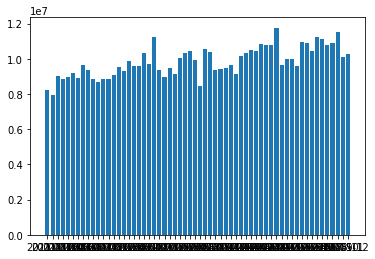

In [54]:
plt.bar(range(len(monthTotalRiders)), list(monthTotalRiders.values()), tick_label=list(monthTotalRiders.keys()))
n = 5  # Keeps every 7th label


In [58]:
pickle.dump(tripDataDict, open("tripDataDict.pickle", "wb") )

In [84]:
averagedStationPairTotalRiders = {}

for ridership in averagedTripDataDict:
    pair, month, bucket = ridership #avgVolume is average monthly volume
    avgVolume = averagedTripDataDict[ridership]
    if pair not in averagedStationPairTotalRiders:
        averagedStationPairTotalRiders[(pair, bucket)] = [averagedTripDataDict[ridership], 1]
    else:
        stationPairTotalRiders[(pair, bucket)][0] += averagedTripDataDict[ridership]
        stationPairTotalRiders[(pair, bucket)][1] += 1
# print(stationPairTotalRiders)
averageOverMonths = {}
for pair in averagedStationPairTotalRiders:
    sum, count = tuple(averagedStationPairTotalRiders[pair])
    averageOverMonths[pair] = sum / count

# print(averageOverMonths)

print(dict(sorted(averageOverMonths.items(), key=lambda item: item[1])))

{(('ORIN', 'NCON'), 'am_peak'): 0.03225806451612903, (('CAST', 'ORIN'), 'night'): 0.03225806451612903, (('ORIN', 'CAST'), 'am_peak'): 0.03225806451612903, (('WDUB', 'NCON'), 'am_peak'): 0.03225806451612903, (('OAKL', 'COLM'), 'am_peak'): 0.03225806451612903, (('LAFY', 'DUBL'), 'night'): 0.06451612903225806, (('CAST', 'NCON'), 'night'): 0.06451612903225806, (('ORIN', 'DUBL'), 'night'): 0.06451612903225806, (('SHAY', 'ORIN'), 'night'): 0.06451612903225806, (('NCON', 'PLZA'), 'night'): 0.06451612903225806, (('SHAY', 'ROCK'), 'night'): 0.06451612903225806, (('LAFY', 'WDUB'), 'night'): 0.06451612903225806, (('WDUB', 'LAFY'), 'am_peak'): 0.06451612903225806, (('NCON', 'WDUB'), 'night'): 0.06451612903225806, (('CAST', 'ORIN'), 'noon'): 0.0967741935483871, (('ORIN', 'WOAK'), 'night'): 0.0967741935483871, (('NCON', 'ORIN'), 'night'): 0.0967741935483871, (('LAFY', 'SANL'), 'night'): 0.0967741935483871, (('SSAN', 'CAST'), 'night'): 0.0967741935483871, (('ORIN', 'SHAY'), 'night'): 0.09677419354838

In [89]:
peakRatio = {}
for ridership in averageOverMonths:
    pair, time = ridership
    peak = averageOverMonths[(pair, "am_peak")] + averageOverMonths[(pair, "pm_peak")]
    off = averageOverMonths[(pair, "noon")] + averageOverMonths[(pair, "night")]
    peakRatio[pair] = off / peak
print(dict(sorted(peakRatio.items(), key=lambda item: item[1])))

{('NCON', '19TH'): 0.07829591249280368, ('COLM', '19TH'): 0.09182984469952735, ('PHIL', '19TH'): 0.09491997216423104, ('UCTY', '19TH'): 0.09975550122249388, ('SSAN', '19TH'): 0.10372881355932204, ('DUBL', '19TH'): 0.10731102850061959, ('SHAY', '19TH'): 0.10802469135802469, ('WDUB', '19TH'): 0.11497189575881452, ('SANL', 'ORIN'): 0.11585365853658537, ('NCON', '12TH'): 0.11671641791044776, ('GLEN', 'PHIL'): 0.11711229946524064, ('WDUB', '12TH'): 0.1196736174070716, ('CONC', '19TH'): 0.12329666721392217, ('CAST', 'ORIN'): 0.125, ('CAST', '19TH'): 0.12523961661341854, ('NCON', 'SSAN'): 0.12582781456953643, ('FRMT', '19TH'): 0.12636439966414778, ('PHIL', '12TH'): 0.1301266586248492, ('EMBR', 'UCTY'): 0.1315081315081315, ('EMBR', 'FRMT'): 0.1315781454733827, ('COLM', 'EMBR'): 0.134086140935456, ('WDUB', 'COLM'): 0.1348314606741573, ('PHIL', 'MONT'): 0.13492140032790045, ('NCON', 'MCAR'): 0.13676907829534193, ('UCTY', 'MONT'): 0.13821398807615873, ('SSAN', 'EMBR'): 0.13829607046070458, ('LAFY

In [83]:
print(sum_dict(averagedStationPairTotalRiders))

339483.70967741933


In [182]:
averageInflow = {}
averageOutflow = {}
totalFlow = {}

inflowCount = {}
outFlowCount = {}

for ridership in tripDataDict:
    pair, day, bucket = ridership
    day = day[:-1]
    volume = tripDataDict[ridership]
    entry, exit = pair
    if (entry, bucket) not in outFlowCount:
        outFlowCount[(entry, bucket)] = [volume * monthLengths[day]/(913/30), 1]
    else:
        outFlowCount[(entry, bucket)][0] += volume * monthLengths[day]/(913/30)
        outFlowCount[(entry, bucket)][1] += 1
    if (exit, bucket) not in inflowCount:
        inflowCount[(exit, bucket)] = [volume * monthLengths[day]/(913/30), 1]
    else:
        inflowCount[(exit, bucket)][0] += volume * monthLengths[day]/(913/30)
        inflowCount[(exit, bucket)][1] += 1

for station in inflowCount:
    averageInflow[station] = inflowCount[station][0]/inflowCount[station][1]
    averageOutflow[station] = outFlowCount[station][0]/outFlowCount[station][1]
    totalFlow[station] = averageInflow[station] + averageOutflow[station]

#print(dict(sorted(averageInflow.items(), key=lambda item: item[1])))

peakInflowOutflowRatioAM = {}
peakInflowOutflowRatioPM = {}
for stationTime in averageInflow:
    stationName, time = stationTime
    if time == "am_peak":
        peakInflowOutflowRatioAM[stationName] = averageInflow[stationTime] / averageOutflow[stationTime]
    elif time == "pm_peak":
        peakInflowOutflowRatioPM[stationName] = averageInflow[stationTime] / averageOutflow[stationTime]

offPeakFlowRatio = {}
onPeakFlowRatio = {}
for stationTime in totalFlow:
    stationName, time = stationTime
    peak = totalFlow[(stationName, "am_peak")] + totalFlow[(stationName, "am_peak")]
    off = totalFlow[(stationName, "noon")] + totalFlow[(stationName, "night")]
    offPeakFlowRatio[stationName] = off / (peak + off)
    onPeakFlowRatio[stationName] = peak / (peak + off)

print(dict(sorted(offPeakFlowRatio.items(), key=lambda item: item[1])))
print(dict(sorted(onPeakFlowRatio.items(), key=lambda item: item[1])))

{'PHIL': 0.19476729028351672, 'MONT': 0.20565517589690668, 'EMBR': 0.21047367913870701, 'NCON': 0.2252449831901415, 'UCTY': 0.22554830025286549, 'SSAN': 0.2282712783293841, 'FRMT': 0.2328435378675825, 'COLM': 0.23823596822104937, '19TH': 0.23962361656653441, 'LAFY': 0.2420628619063936, 'SHAY': 0.24256512994562468, 'DUBL': 0.24283053000120985, 'ORIN': 0.24427302973899062, 'CONC': 0.2443631542504039, '12TH': 0.24970672965529653, 'WCRK': 0.2550662615690763, 'WDUB': 0.256856469725529, 'SANL': 0.2684416862968872, 'CAST': 0.26894839212215227, 'MLBR': 0.2698436466247586, 'PITT': 0.27131637775818845, 'GLEN': 0.27798583664133664, 'DELN': 0.2800903226632317, 'SBRN': 0.283398038004784, 'HAYW': 0.2894403410291379, 'DALY': 0.2963920371150125, 'LAKE': 0.29819449086550065, 'PLZA': 0.2983721532097223, 'RICH': 0.29846938292625586, 'BALB': 0.30307554437500034, 'CIVC': 0.30375430650000407, 'NBRK': 0.3040538706215521, 'BAYF': 0.3062059968448275, 'MCAR': 0.307633250991675, 'ROCK': 0.3139530636851549, 'FTVL

In [104]:
companies = pd.read_csv("Data/companies.csv")
demographics = pd.read_csv("Data/demographics.csv")
fares = pd.read_csv("Data/fares.csv")
real_estate = pd.read_csv("Data/real_estate.csv")
stations = pd.read_csv("Data/stations.csv")
weather = pd.read_csv("Data/weather.csv")

In [123]:
demographic_dict = dict()

for row in demographics.itertuples():
    demographic_dict[(row.zipcode, row.year)] = [
        row.gini, row.median_household_income, (row.some_college + row.bach_degree + row.grad_degree) / row.totalpop
    ]

averageDemographics = dict()
years = [2011, 2012, 2013, 2014]

for demographic in demographic_dict:
    zipcode, dummy = demographic
    avgGini = 0
    avgIncome = 0
    avgDegrees = 0
    count = 0
    for year in years:
        gini, income, degrees = demographic_dict[(zipcode,year)]
        if not np.isnan(gini):
            count += 1
            avgGini += gini
            avgIncome += income
            avgDegrees += degrees
    if count == 0:
        averageDemographics[zipcode] = None
    else:
        averageDemographics[zipcode] = (
            avgGini / count,
            avgIncome / count,
            avgDegrees / count
        )
# for demographic in demographic_dict:
#     zipcode, year = demographic
#     if zipcode not in averageDemographics:
#         if not np.isnan(demographic[0]):
#             averageDemographics[zipcode] = [list(demographic), 1]
#     else:
#         for i in range(len(averageDemographics[zipcode][0])):
#             averageDemographics[zipcode][0][i] += demographic[i]
#         averageDemographics[zipcode][0] += 1

print(averageDemographics)

{94014: (0.3977, 75544.0, 0.3973228153360263), 94030: (0.42824999999999996, 101221.25, 0.5281513340150701), 94066: (0.3903, 87140.5, 0.48350995353051485), 94080: (0.39937500000000004, 86084.75, 0.4283128131609666), 94102: (0.6017499999999999, 34680.5, 0.5174058503323091), 94104: (0.60335, 45155.75, 0.4998134687630279), 94110: (0.478, 81430.25, 0.5457689624658166), 94111: (0.5560250000000001, 129575.25, 0.6720193374675489), 94112: (0.4133, 75791.25, 0.38048931750085657), 94128: None, 94131: (0.4411, 130974.75, 0.7159996821148038), 94520: (0.402825, 48501.0, 0.30110179982933405), 94530: (0.4204, 100260.0, 0.6358918417333197), 94536: (0.4086, 98239.75, 0.4542727458581565), 94541: (0.42325, 61178.5, 0.3391732253691453), 94544: (0.4007, 65694.0, 0.3008170747927185), 94546: (0.42085, 86790.5, 0.4669782974731097), 94549: (0.464675, 162374.25, 0.6292413725792299), 94563: (0.44632499999999997, 196663.0, 0.6418530090341718), 94565: (0.4344, 60133.25, 0.3013285815290714), 94568: (0.36360000000000

In [127]:
stationZipcodes = {}
for row in stations.itertuples():
    stationZipcodes[row.abbr] = row.zipcode

print(stationZipcodes)

{'12TH': 94612, '16TH': 94110, '19TH': 94612, '24TH': 94110, 'ASHB': 94703, 'BALB': 94112, 'BAYF': 94578, 'CAST': 94546, 'CIVC': 94102, 'COLS': 94621, 'COLM': 94014, 'CONC': 94520, 'DALY': 94014, 'DBRK': 94704, 'DUBL': 94588, 'DELN': 94530, 'PLZA': 94530, 'EMBR': 94111, 'FRMT': 94536, 'FTVL': 94601, 'GLEN': 94131, 'HAYW': 94541, 'LAFY': 94549, 'LAKE': 94607, 'MCAR': 94609, 'MLBR': 94030, 'MONT': 94104, 'NBRK': 94702, 'NCON': 94520, 'OAKL': 94621, 'ORIN': 94563, 'PITT': 94565, 'PHIL': 94597, 'POWL': 94102, 'RICH': 94801, 'ROCK': 94618, 'SBRN': 94066, 'SFIA': 94128, 'SANL': 94577, 'SHAY': 94544, 'SSAN': 94080, 'UCTY': 94587, 'WCRK': 94596, 'WDUB': 94568, 'WOAK': 94607}


MONT


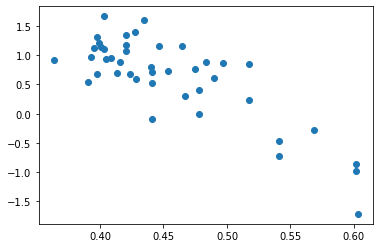

[-0.7194758822320363, 0.0003224632033104067, 0.40778237866506284, 0.6112149410637177, 0.7044162561713031, 0.938221952769442, -0.9834163575222042, 0.5176969336085774, 1.0993948553225512, 0.680901004919979, -0.27499544157661937, 1.3443633621388988, 0.9762052222880969, 0.7985491130015481, 0.710589363531383, 0.6867267032993697, 1.1627592592837022, 0.29432841315253344, 0.5878315423199989, -1.715847404859017, 0.7726811597442634, 1.1530734579051423, 1.609899961201014, 1.0655860878066543, -0.8535390569880542, 0.8651608753582483, 0.8835945581915053, 0.8893184185000115, 1.1483245763710745, 1.1167492696039156, 0.734688918989113, 0.8452247820583372, -0.46474685387962567, 1.1736893953676488, 1.3091024340641844, 0.9541826952739857, 0.2290903389471433, 1.6676792659847686, 1.3989800678908693, 0.5468484441663162, 1.2124981967026212, 0.9180988316292763, -0.09563866888094523]
[34812.75, 81430.25, 81430.25, 85997.25, 75791.25, 59214.75, 34680.5, 32495.25, 48501.0, 75544.0, 51898.25, 100260.0, 135806.0, 38

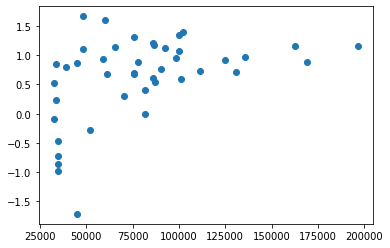

[[ 34812.75]
 [ 81430.25]
 [ 81430.25]
 [ 85997.25]
 [ 75791.25]
 [ 59214.75]
 [ 34680.5 ]
 [ 32495.25]
 [ 48501.  ]
 [ 75544.  ]
 [ 51898.25]
 [100260.  ]
 [135806.  ]
 [ 38922.5 ]
 [130974.75]
 [ 61178.5 ]
 [162374.25]
 [ 70423.75]
 [101221.25]
 [ 45155.75]
 [ 90312.  ]
 [196663.  ]
 [ 60133.25]
 [100260.  ]
 [ 34680.5 ]
 [ 45186.25]
 [169336.5 ]
 [ 77765.5 ]
 [ 65694.  ]
 [ 92629.75]
 [111339.25]
 [ 33442.25]
 [ 34812.75]
 [ 86790.5 ]
 [ 75544.  ]
 [ 98239.75]
 [ 33442.25]
 [ 48501.  ]
 [102349.  ]
 [ 87140.5 ]
 [ 86084.75]
 [124989.5 ]
 [ 32495.25]]
[[-7.19475882e-01]
 [ 3.22463203e-04]
 [ 4.07782379e-01]
 [ 6.11214941e-01]
 [ 7.04416256e-01]
 [ 9.38221953e-01]
 [-9.83416358e-01]
 [ 5.17696934e-01]
 [ 1.09939486e+00]
 [ 6.80901005e-01]
 [-2.74995442e-01]
 [ 1.34436336e+00]
 [ 9.76205222e-01]
 [ 7.98549113e-01]
 [ 7.10589364e-01]
 [ 6.86726703e-01]
 [ 1.16275926e+00]
 [ 2.94328413e-01]
 [ 5.87831542e-01]
 [-1.71584740e+00]
 [ 7.72681160e-01]
 [ 1.15307346e+00]
 [ 1.60989996e+00]
 [ 

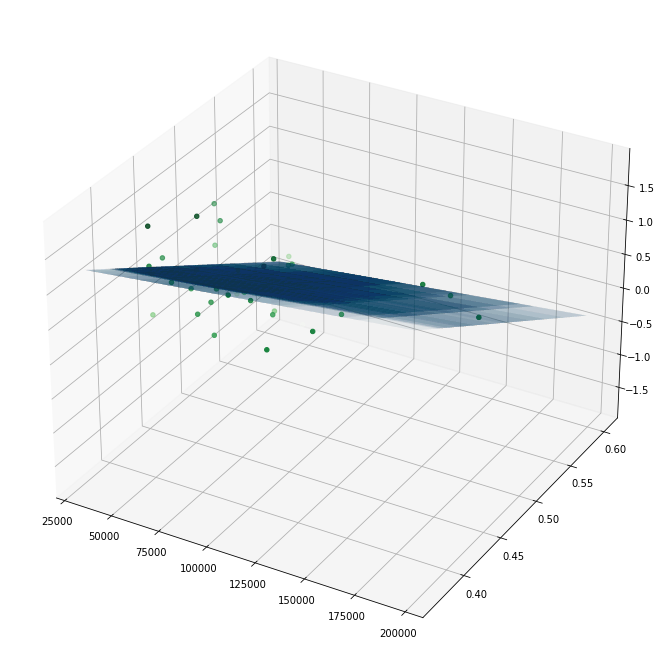

In [241]:
import copy
ratio = []
income = []
gini = []
for station in peakInflowOutflowRatioPM:
    zip = stationZipcodes[station]
    if averageDemographics[zip] is not None and station not in {"EMBR",}:
        ratio.append(np.log(peakInflowOutflowRatioPM[station]))
        income.append(averageDemographics[zip][1])
        gini.append(averageDemographics[zip][0])
        if peakInflowOutflowRatioPM[station] < 0.3:
            print(station)
dIncome = copy.deepcopy(income)
dGini = copy.deepcopy(gini)

plt.scatter(gini, ratio)
plt.plot(income, reg.predict(income), color = 'k')
plt.show()

print(ratio)
print(income)
plt.scatter(income, ratio)
plt.show()

from sklearn.metrics import r2_score

income = np.array(income)
X = np.array([income, gini]).T

ratio = np.array(ratio)
ratio = ratio[:, np.newaxis]
income = income[ :, np.newaxis]

print(income)
print(ratio)

reg = LinearRegression()
reg.fit(X, ratio)
# plt.scatter(income, ratio)
# plt.plot(income, reg.predict(income), color = 'k')
# plt.show()
from mpl_toolkits import mplot3d
# print(X)
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,12))
ax = plt.axes(projection = '3d')
ax.scatter3D(income, gini, ratio, c = ratio, cmap = "Greens")
newX, newY = np.meshgrid(income, gini)
print(newX)
zs = np.array(reg.predict(np.array([np.ravel(newX), np.ravel(newY)]).T))
Z = zs.reshape(newX.shape)
ax.plot_surface(newX, newY, Z, alpha=0.02)
print(f'R^2 = {reg.score(X,ratio)}')

GLEN
DUBL
RICH
BAYF
COLM
CONC
DELN
FTVL
NCON
PHIL
PITT
PLZA
ROCK
SANL
WOAK
NBRK
SSAN
ORIN
CAST
UCTY
LAFY
SHAY
FRMT
WDUB
[14.078664414656766, 4.058323951181883, 0.44986107151103993, 0.25590296621691166, 3.3137826852101466, 0.24635289303758615, 0.38628101509804125, 0.6267740559797764, 0.27211750379364613, 0.30247167042354534, 0.22906596763137105, 0.1581679178322619, 0.6082206074043524, 0.22352503922972566, 0.37943148449522957, 1.9556197367616166, 0.15738993310331226, 0.2941920403189813, 0.3988426873193131, 0.09629403165317071, 0.14165892790297777, 0.10183243997536108, 0.1718198682927641, 0.25216341932415076, 0.29701134804849755, 0.36220962869710477, 0.18049110084488273, 2.5076951769487437, 1.0832004713102215, 1.9377215498778475, 0.340031052808793, 0.2826289748934395, 0.180005463614827, 0.8103325795909866, 0.191913262562974, 0.1414447862722711, 0.22011097337779595, 0.19175777234900232, 0.44432024948582494, 0.18662316674252427, 0.27761785266261735, 0.27230093587078785, 1.434582133345892]
[

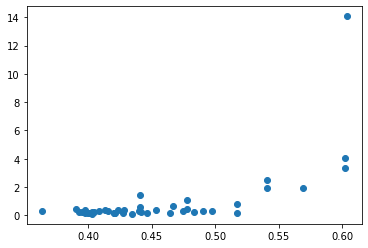

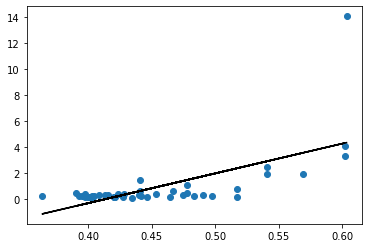

R^2 = 0.4010037802467691


In [245]:
ratio = []
income = []
for station in peakInflowOutflowRatioAM:
    zip = stationZipcodes[station]
    if averageDemographics[zip] is not None and station not in {"EMBR",}:
        ratio.append(peakInflowOutflowRatioAM[station])
        income.append(averageDemographics[zip][0])
        if peakInflowOutflowRatioAM[station] < 0.3:
            print(station)

print(ratio)
print(income)
plt.scatter(income, ratio)
plt.show()

from sklearn.metrics import r2_score

income = np.array(income)
ratio = np.array(ratio)
income = income[ :, np.newaxis]


reg = LinearRegression()
reg.fit(income, ratio)
plt.scatter(income, ratio)
plt.plot(income, reg.predict(income), color = 'k')
plt.show()
print(f'R^2 = {reg.score(income,ratio)}')


In [156]:
ratio = []
income = []
for station in peakInflowOutflowRatioPM:
    zip = stationZipcodes[station]
    if averageDemographics[zip] is not None:
        ratio.append(np.log(peakRatio[station]))
        income.append(averageDemographics[zip][1])
        if peakRatio[station] > 4.5:
            print(station)

print(ratio)
print(income)
plt.scatter(income, ratio)
plt.show()

KeyError: '12TH'

In [247]:
fareDict = {}
for row in fares.itertuples():
    station1, station2, fare =  row.station1, row.station2, row.fare
    fareDict[(station1, station2)] = fare
    fareDict[(station2, station1)] = fare

print(fareDict)

{('12TH', '16TH'): 3.6, ('16TH', '12TH'): 3.6, ('12TH', '19TH'): 1.95, ('19TH', '12TH'): 1.95, ('12TH', '24TH'): 3.7, ('24TH', '12TH'): 3.7, ('12TH', 'ASHB'): 1.95, ('ASHB', '12TH'): 1.95, ('12TH', 'BALB'): 4.1, ('BALB', '12TH'): 4.1, ('12TH', 'BAYF'): 2.85, ('BAYF', '12TH'): 2.85, ('12TH', 'CAST'): 3.3, ('CAST', '12TH'): 3.3, ('12TH', 'CIVC'): 3.45, ('CIVC', '12TH'): 3.45, ('12TH', 'COLS'): 1.95, ('COLS', '12TH'): 1.95, ('12TH', 'COLM'): 4.2, ('COLM', '12TH'): 4.2, ('12TH', 'CONC'): 4.05, ('CONC', '12TH'): 4.05, ('12TH', 'DALY'): 4.2, ('DALY', '12TH'): 4.2, ('12TH', 'DBRK'): 1.95, ('DBRK', '12TH'): 1.95, ('12TH', 'DUBL'): 4.4, ('DUBL', '12TH'): 4.4, ('12TH', 'DELN'): 2.55, ('DELN', '12TH'): 2.55, ('12TH', 'PLZA'): 2.25, ('PLZA', '12TH'): 2.25, ('12TH', 'EMBR'): 3.45, ('EMBR', '12TH'): 3.45, ('12TH', 'FRMT'): 4.4, ('FRMT', '12TH'): 4.4, ('12TH', 'FTVL'): 1.95, ('FTVL', '12TH'): 1.95, ('12TH', 'GLEN'): 3.95, ('GLEN', '12TH'): 3.95, ('12TH', 'HAYW'): 3.3, ('HAYW', '12TH'): 3.3, ('12TH', 

In [262]:
offPeakAvgFareExitingCount = dict() #avg fare for person leaving a station in off peak hours
for row in tripData.itertuples():
    hour = row.hour
    enterStation = row.enter_abbr
    exitStation = row.exit_abbr
    riders = row.trip_count
    tempBucket = None
    for bucket in buckets:
        if hour in buckets[bucket]:
            tempBucket = bucket
    if tempBucket != "am_peak" and bucket != "pm_peak":
        fare = fareDict.get((enterStation, exitStation), 0)
        vol = riders
        if enterStation not in offPeakAvgFareExitingCount:
            offPeakAvgFareExitingCount[enterStation] = [fare * vol, vol]
        else:
            offPeakAvgFareExitingCount[enterStation][0] += fare*vol
            offPeakAvgFareExitingCount[enterStation][1] += vol
    if row.Index % 1000000 == 0:
        print(row.Index)

print(offPeakAvgFareExitingCount)

0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
18000000
19000000
20000000
21000000
22000000
23000000
24000000
25000000
26000000
27000000
28000000
29000000
30000000
31000000
32000000
33000000
34000000
35000000
36000000
37000000
38000000
39000000
40000000
41000000
42000000
43000000
44000000
45000000
46000000
47000000
48000000
{'12TH': [48860762.000010744, 15051030], '16TH': [48020115.6500187, 14415481], '19TH': [42288846.19999734, 12942836], '24TH': [38391011.09998508, 12507610], 'ASHB': [14225978.54999344, 4492681], 'BALB': [27377950.250001308, 10099796], 'BAYF': [13829446.449988676, 4354782], 'CAST': [6625529.200001676, 1764922], 'CIVC': [115443492.80002302, 29468972], 'COLM': [9848491.100000119, 2475752], 'COLS': [29240006.699993227, 8720414], 'CONC': [15996327.60000668, 3677479], 'DALY': [30298921.899981573, 7333837], 'DBRK': [52084914.50000181, 15982877], 'DELN': [18338519.39999911, 50

In [263]:
offPeakAvgFareEnteringFrom = {}
for station in offPeakAvgFareExitingCount:
    offPeakAvgFareEnteringFrom[station] = offPeakAvgFareExitingCount[station][0] / offPeakAvgFareExitingCount[station][1]

print(dict(sorted(offPeakAvgFareEnteringFrom.items(), key=lambda item: item[1])))

{'BALB': 2.710742895203161, 'GLEN': 2.9664336472180515, '24TH': 3.0694122298332838, 'LAKE': 3.155326277758924, 'ASHB': 3.1664786683037236, 'BAYF': 3.175692020860901, 'WOAK': 3.18511134663795, 'FTVL': 3.2004431742002653, '12TH': 3.246340084367033, 'PLZA': 3.257879233161375, 'DBRK': 3.2587946775791248, '19TH': 3.267355485304561, 'MCAR': 3.2979979327324607, '16TH': 3.3311490369290278, 'COLS': 3.3530525844292742, 'HAYW': 3.3977590010530725, 'SANL': 3.429818908426187, 'NBRK': 3.444882499606816, 'ROCK': 3.577325893160949, 'DELN': 3.644872399290665, 'RICH': 3.6905082204988213, 'CAST': 3.754006805967445, 'SHAY': 3.756124058688604, 'POWL': 3.801898462065375, 'ORIN': 3.877692638434827, 'CIVC': 3.9174591091953603, 'COLM': 3.977979660321437, 'MONT': 4.093950878572318, 'DALY': 4.131387416979893, 'LAFY': 4.173520190645518, 'SSAN': 4.177008885826875, 'WCRK': 4.191279359553473, 'UCTY': 4.202507356043402, 'EMBR': 4.220229243306657, 'CONC': 4.349808007063175, 'SBRN': 4.412506129584686, 'FRMT': 4.5612107

GLEN
DUBL
RICH
BAYF
COLM
CONC
DELN
FTVL
NCON
PHIL
PITT
PLZA
ROCK
SANL
WOAK
NBRK
SSAN
ORIN
CAST
UCTY
LAFY
SHAY
FRMT
WDUB
[4.093950878572318, 3.801898462065375, 3.0694122298332838, 2.9664336472180515, 3.9174591091953603, 5.253171869670993, 4.672864378839892, 3.2979979327324607, 3.6905082204988213, 3.1664786683037236, 3.175692020860901, 3.977979660321437, 3.3530525844292742, 4.349808007063175, 4.131387416979893, 3.2587946775791248, 3.644872399290665, 4.220229243306657, 3.2004431742002653, 3.3977590010530725, 5.0161959184828495, 4.650639598342572, 5.382910904504384, 3.257879233161375, 3.577325893160949, 3.429818908426187, 4.191279359553473, 3.18511134663795, 3.246340084367033, 3.3311490369290278, 3.267355485304561, 2.710742895203161, 3.444882499606816, 4.177008885826875, 3.155326277758924, 3.877692638434827, 3.754006805967445, 4.202507356043402, 4.173520190645518, 4.412506129584686, 3.756124058688604, 4.561210739125251, 4.754702347227821]
[45155.75, 34680.5, 81430.25, 130974.75, 34680.5, 1

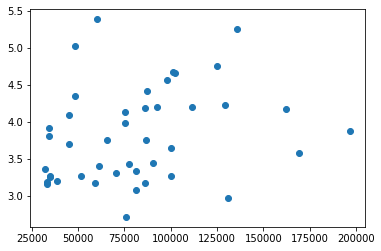

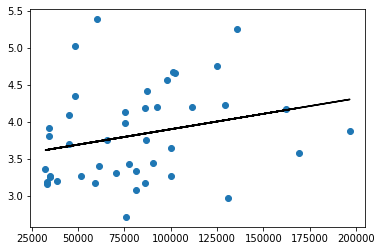

R^2 = 0.06497644206312769


In [265]:
ratio = []
income = []
for station in peakInflowOutflowRatioAM:
    zip = stationZipcodes[station]
    if averageDemographics[zip] is not None and station not in {"OAKL",}:
        ratio.append(offPeakAvgFareEnteringFrom[station])
        income.append(averageDemographics[zip][1])
        if peakInflowOutflowRatioAM[station] < 0.3:
            print(station)

print(ratio)
print(income)
plt.scatter(income, ratio)
plt.show()

from sklearn.metrics import r2_score

income = np.array(income)
ratio = np.array(ratio)
income = income[ :, np.newaxis]


reg = LinearRegression()
reg.fit(income, ratio)
plt.scatter(income, ratio)
plt.plot(income, reg.predict(income), color = 'k')
plt.show()
print(f'R^2 = {reg.score(income,ratio)}')


In [270]:
onPeakAvgFareEnteringCount = dict() #avg fare for person leaving a station in off peak hours
for row in tripData.itertuples():
    hour = row.hour
    enterStation = row.enter_abbr
    exitStation = row.exit_abbr
    riders = row.trip_count
    tempBucket = None
    for bucket in buckets:
        if hour in buckets[bucket]:
            tempBucket = bucket
    if tempBucket == "am_peak":
        fare = fareDict.get((enterStation, exitStation), 0)
        vol = riders
        if enterStation not in onPeakAvgFareEnteringCount:
            onPeakAvgFareEnteringCount[enterStation] = [fare * vol, vol]
        else:
            onPeakAvgFareEnteringCount[enterStation][0] += fare*vol
            onPeakAvgFareEnteringCount[enterStation][1] += vol
    if row.Index % 1000000 == 0:
        print(row.Index)

print(onPeakAvgFareEnteringCount)

0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
18000000
19000000
20000000
21000000
22000000
23000000
24000000
25000000
26000000
27000000
28000000
29000000
30000000
31000000
32000000
33000000
34000000
35000000
36000000
37000000
38000000
39000000
40000000
41000000
42000000
43000000
44000000
45000000
46000000
47000000
48000000
{'MONT': [10542478.449999893, 2702542], 'POWL': [17455393.450000495, 4307983], '24TH': [19744624.950000156, 7841442], 'BALB': [20706592.850002002, 9095201], 'CIVC': [16815997.700000856, 4651126], 'DELN': [24692362.049997553, 6775937], 'DUBL': [35142319.49999888, 6048104], 'GLEN': [14497821.250001388, 5975614], 'MLBR': [20501060.29999792, 4417612], 'PHIL': [32002997.250004582, 6362298], 'RICH': [11525459.299999243, 3045901], '12TH': [12435509.599998873, 3725896], '16TH': [12497411.399996227, 4613722], '19TH': [13258546.349998793, 3965752], 'ASHB': [12636027.499999361, 3

In [271]:
onPeakAvgFareEnteringFrom = {}
for station in onPeakAvgFareEnteringCount:
    onPeakAvgFareEnteringFrom[station] = onPeakAvgFareEnteringCount[station][0] / onPeakAvgFareEnteringCount[station][1]

print(dict(sorted(onPeakAvgFareEnteringFrom.items(), key=lambda item: item[1])))

{'BALB': 2.2766503840873886, 'GLEN': 2.426164282030497, '24TH': 2.5179839307617344, '16TH': 2.708748251410949, 'WOAK': 3.2346445203880716, '12TH': 3.3375890255656286, '19TH': 3.3432615932612006, 'LAKE': 3.3839587831921523, 'MCAR': 3.4654196470402727, 'ASHB': 3.4686840495780715, 'FTVL': 3.4806602851937125, 'COLS': 3.5010916272873667, 'PLZA': 3.537408571508327, 'DALY': 3.543729556992648, 'CIVC': 3.6154681038528858, 'DELN': 3.644125092957262, 'DBRK': 3.6746222567934357, 'NBRK': 3.6769545448717222, 'EMBR': 3.7513133375957497, 'COLM': 3.7620483108700813, 'ROCK': 3.7838273622004417, 'RICH': 3.783924461103379, 'SANL': 3.8079483938726715, 'BAYF': 3.819605256395543, 'MONT': 3.9009489769261285, 'SSAN': 3.9768159863097385, 'HAYW': 4.016552432713162, 'POWL': 4.05187147906584, 'ORIN': 4.242294288683284, 'SBRN': 4.355634409939664, 'SHAY': 4.401931161648895, 'CAST': 4.429797970610299, 'LAFY': 4.614393814067854, 'MLBR': 4.640756204935589, 'WCRK': 4.92264075222577, 'PHIL': 5.030100326958055, 'CONC': 5.

GLEN
DUBL
RICH
BAYF
COLM
CONC
DELN
FTVL
NCON
PHIL
PITT
PLZA
ROCK
SANL
WOAK
NBRK
SSAN
ORIN
CAST
UCTY
LAFY
SHAY
FRMT
WDUB
[3.9009489769261285, 4.05187147906584, 2.5179839307617344, 2.426164282030497, 3.6154681038528858, 5.8104687849281165, 4.640756204935589, 3.4654196470402727, 3.783924461103379, 3.4686840495780715, 3.819605256395543, 3.7620483108700813, 3.5010916272873667, 5.056391976989978, 3.543729556992648, 3.6746222567934357, 3.644125092957262, 3.7513133375957497, 3.4806602851937125, 4.016552432713162, 5.515070087246308, 5.030100326958055, 5.583364667499358, 3.537408571508327, 3.7838273622004417, 3.8079483938726715, 4.92264075222577, 3.2346445203880716, 3.3375890255656286, 2.708748251410949, 3.3432615932612006, 2.2766503840873886, 3.6769545448717222, 3.9768159863097385, 3.3839587831921523, 4.242294288683284, 4.429797970610299, 5.09135552647254, 4.614393814067854, 4.355634409939664, 4.401931161648895, 5.531906113855081, 5.606668249634185]
[0.60335, 0.6017499999999999, 0.478, 0.4411, 

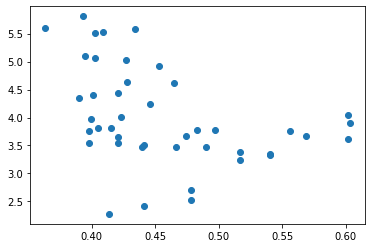

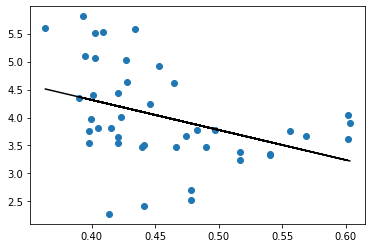

R^2 = 0.15207331963914827


In [275]:
ratio = []
income = []
for station in peakInflowOutflowRatioAM:
    zip = stationZipcodes[station]
    if averageDemographics[zip] is not None and station not in {"OAKL",}:
        ratio.append(onPeakAvgFareEnteringFrom[station])
        income.append(averageDemographics[zip][0])
        if peakInflowOutflowRatioAM[station] < 0.3:
            print(station)

print(ratio)
print(income)
plt.scatter(income, ratio)
plt.show()

from sklearn.metrics import r2_score

income = np.array(income)
ratio = np.array(ratio)
income = income[ :, np.newaxis]


reg = LinearRegression()
reg.fit(income, ratio)
plt.scatter(income, ratio)
plt.plot(income, reg.predict(income), color = 'k')
plt.show()
print(f'R^2 = {reg.score(income,ratio)}')
